## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')

# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(mouse_df['Mouse ID'])

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_mouse_df = mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df['Duplicated'] = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mouse_df = mouse_df[mouse_df['Duplicated'] == True]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedrug_df = clean_mouse_df.drop_duplicates(subset=['Mouse ID'],keep='last')

In [46]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

249

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mice_median = mousedrug_df[['Tumor Volume (mm3)']].median()
mice_mean = mousedrug_df[['Tumor Volume (mm3)']].mean()
mice_mode = mousedrug_df['Tumor Volume (mm3)'].mode()[0]

quartiles = mousedrug_df[['Tumor Volume (mm3)']].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq
# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = mousedrug_df.groupby('Drug Regimen')
# This method produces everything in a single groupby function
sumstats = grouped_regimen[['Tumor Volume (mm3)']].describe()


## Bar and Pie Charts

Text(0, 0.5, 'Count')

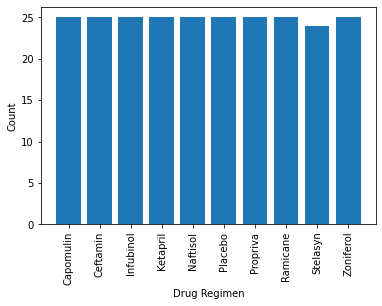

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])

s_ = pd.Series(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
s_.plot

plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

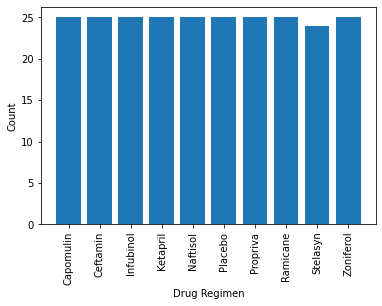

In [50]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(sumstats.index,sumstats[(('Tumor Volume (mm3)', 'count'))])
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Count')

<AxesSubplot:ylabel='Sex'>

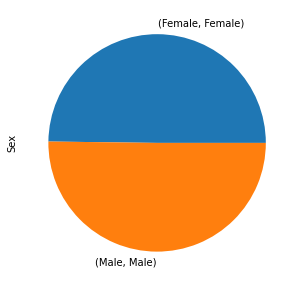

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = mousedrug_df.groupby('Sex')
gender_group['Sex'].count()

gender = gender_group['Sex']
colors = ['Blue','Pink']
size = gender_group['Sex'].value_counts()

size.plot.pie(y = 'Sex', figsize=(5,5))

#gender_group.plot()

#plt.pie(mousedrug_df['Gender'],)


([<matplotlib.patches.Wedge at 0x177c6c6b160>,
 [Text(0.006939175976765795, 1.0999781124353174, "('Female', 19      Female\n29      Female\n94      Female\n134     Female\n144     Female\n         ...  \n1857    Female\n1859    Female\n1862    Female\n1872    Female\n1882    Female\nName: Sex, Length: 124, dtype: object)"),
  Text(-0.006939175976765929, -1.0999781124353174, "('Male', 9       Male\n39      Male\n49      Male\n59      Male\n64      Male\n        ... \n1763    Male\n1797    Male\n1803    Male\n1855    Male\n1892    Male\nName: Sex, Length: 125, dtype: object)")],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

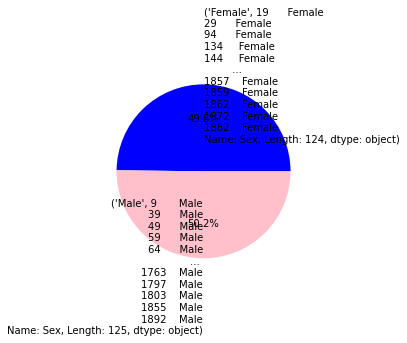

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(size, labels = gender, colors=colors,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_set = ['Capomulin', 'Raminca', 'Infubinol', 'Ceftamin']

drugset_df = mousedrug_df
drugset_df.reset_index() 
drugset_df = drugset_df[drugset_df['Drug Regimen'].isin(drug_set)]

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Capomulin,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Capomulin,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Capomulin,Female,21,28,5,45.934712,0
1862,z435,Capomulin,Female,12,26,10,48.710661,0
1872,z581,Capomulin,Female,24,25,45,62.754451,3
1882,z795,Capomulin,Female,13,29,45,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_set:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    aa =aa
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

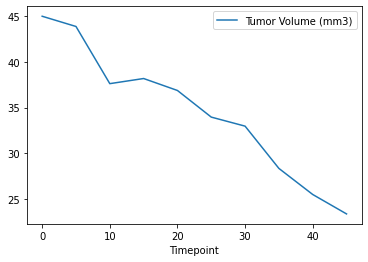

In [137]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen']=='Capomulin']

#Use S185 for a mouse treated with Capomulin
mouse_ = capomulin_df.loc[capomulin_df['Mouse ID']=='s185']
mouse_.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

Text(0, 0.5, 'Weight (g)')

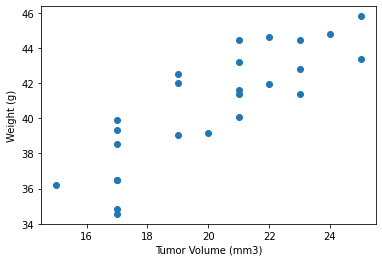

In [173]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse1 = capomulin_df.groupby('Mouse ID')

ave_tumor = mouse1['Tumor Volume (mm3)'].mean()
ave_weight = mouse1['Weight (g)'].mean()
plt.scatter(ave_weight,ave_tumor)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')

#capomulin_df.plot.line(x='Timepoint',y='Weight (g)')

## Correlation and Regression

The correlation between both factors is 0.84


Text(0, 0.5, 'Weight (g)')

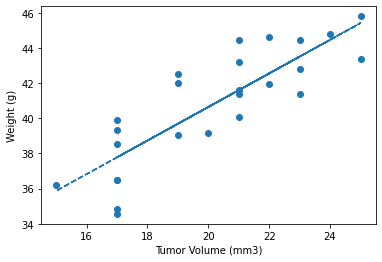

In [178]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(ave_weight,ave_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

m_slope, m_int, m_r, m_p, m_std_err = st.stats.linregress(ave_weight, ave_tumor)
m_fit = m_slope * ave_weight + m_int

plt.scatter(ave_weight,ave_tumor)
plt.plot(ave_weight,m_fit,"--")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
